<a href="https://colab.research.google.com/github/lukilearn/CAPSTONE_2_Bike_Sharing_Demand_Prediction_ML_Regression/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -            <b><u>   Bike Sharing Demand Prediction </u></b>



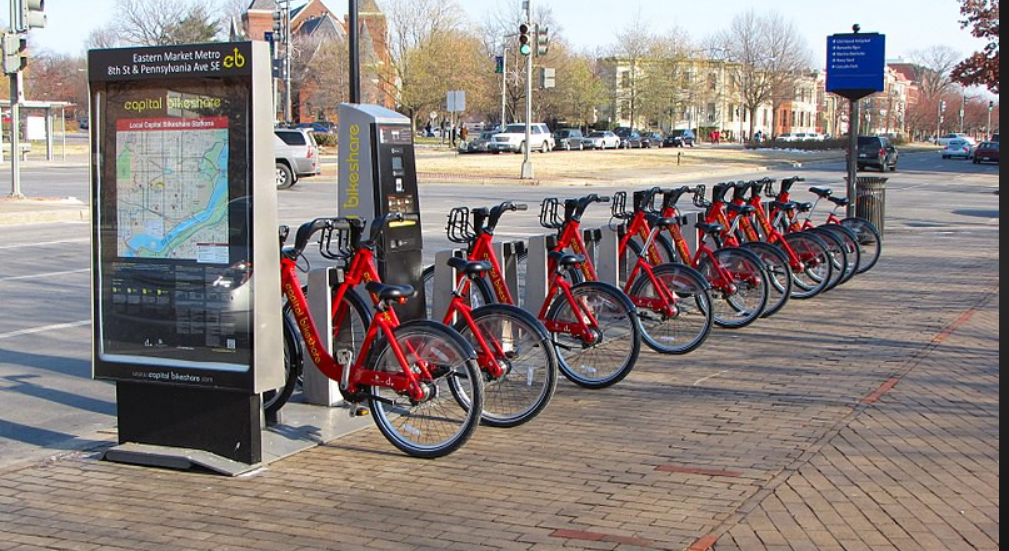

##### **Project Type**    - REGRESSION
##### **Contribution**    - Individual
##### **Name -** G MOHAMED LUQMAN


# **Project Summary -**

Bike Seoul is a bike sharing service in the city of Seoul, South Korea. It is part of the city's efforts to promote sustainable transportation and reduce traffic congestion. The service allows residents and visitors to rent bicycles at various stations across the city and return them to any other station, providing a convenient and eco-friendly mode of transportation.
In recent years, the demand for bike rentals in Seoul has increased, leading to the need for a more efficient and effective way to manage the bike sharing operations. Accurately predicting bike demand is crucial for optimizing fleet management, ensuring the availability of bikes at high-demand locations, and reducing waste and costs.

The main objective of this project is to develop a machine learning model that can accurately predict the demand for bike rentals in Seoul, South Korea, based on historical data and various relevant factors such as weather conditions, time of day, and public holidays.
In this project we have used regression analysis techniques to model the bike demand data. The model trained on a large dataset of past bike rental information, along with relevant weather and time data. The model  then be tested and evaluated using metrics such as mean squared error and r-squared values.
The actual data is from the Seoul city government's open data portal, and this dataset is also available on Kaggle.

So, our main goal was to achieve an accuracy of at least 85% in the bike demand predictions, which would help the city's bike sharing service providers plan their fleet operations more effectively and respond to demand changes in real-time.
We have performed lots of regression algorithms like linear regression, random forest, decision tree, gradient boosting , Xtreme gradient boosting, also we tried to do hyperparameter tuning and cross validation to improve the accuracy of the model. And finally we have decided to select Xtreme gradient boosting algorithm because it gave us high accuracy around 93% and 90% on train and test data resp.

This project not only provided valuable insights into bike demand patterns in Seoul but also demonstrated the practical applications of machine learning in addressing real-world problems. The findings could potentially be extended to other cities with similar bike sharing systems, leading to improved services for bike users and more sustainable transportation systems.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **GitHub Link -**

https://github.com/lukilearn/CAPSTONE_2_Bike_Sharing_Demand_Prediction_ML_Regression

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:

# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import warnings
import warnings
warnings.filterwarnings('ignore')

# Import preporcessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import model selection libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

# Import Outlier influence library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

### Dataset Loading

In [ ]:

# Load Dataset from github repository
url = 'https://raw.githubusercontent.com/lukilearn/CAPSTONE_2_Bike_Sharing_Demand_Prediction_ML_Regression/main/SeoulBikeData.csv'
data = pd.read_csv(url, encoding='unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look

# View top 5 rows of the dataset
data.head()

In [ ]:
# View last 5 rows of the dataset

data.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

### Dataset Information

In [ ]:
# Dataset Info

data.info()



#### Duplicate Values, Missing Values/Null Values, Unique value

In [ ]:
# Dataset Duplicate Value Count
# This user define function will give the type,count of null and non null values as well as null ratio

def bike_info():
  temp=pd.DataFrame(index=data.columns)
  temp["datatype"]=data.dtypes
  temp["not null values"]=data.count()
  temp["null value"]=data.isnull().sum()
  temp["% of null value"]=data.isnull().mean()*100
  temp["unique count"]=data.nunique() # Return Series with number of distinct elements. Can ignore NaN values.
  return temp
bike_info()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

import missingno as msno
msno.bar(data, color='green',sort='ascending', figsize=(10,2), fontsize=15)

In [ ]:

# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,2))
sns.heatmap(data.isna(), cmap = 'coolwarm')


### What did you know about your dataset?

There are a total of 14 feature columns where Rented Bike Count is the dependent variable column. The total number of observations(rows) are 8760.

There are no duplicate rows in the dataset.

Also there are no missing values or Null values in the dataset.

Dataset has all unique values i.e., there is no duplicate, which means data is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.
Date has some object data types, it should be datetime data type.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

print(f'Features: {data.columns.to_list()}')

In [ ]:

#Looking for the description of the dataset to get insights of the data
data.describe()



### Variables Description

 The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:

    Date : year-month-day
    Rented Bike count - Count of bikes rented at each hour
    Hour - Hour of the day
    Temperature-Temperature in Celsius
    Humidity - %
    Windspeed - m/s
    Visibility - 10m
    Dew point temperature - Celsius
    Solar radiation - MJ/m2
    Rainfall - mm
    Snowfall - cm
    Seasons - Winter, Spring, Summer, Autumn
    Holiday - Holiday/No holiday
    Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Observations:

    We are focusing on several key columns of our dataset, including 'Hour', 'Holiday', 'Functioning Day', 'Rented Bike Count', 'Temperature(°C)', and 'Seasons', as they contain a wealth of information.
    By utilizing these features, we plan to create a regression model and implement various regression algorithms.
    There is a column 'Hour' which might be considered a categorical feature or maybe a numerical feature based on the data we will try both and see the result difference.


### Check Unique Values for each variable.

In [ ]:

# Check Unique Values for each variable using a for loop
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# creating a some new features:

# Renaming complex columns name for the sake of simplicity
data=data.rename(columns={'Rented Bike Count':'rented_bike_count',
                                'Date':'date',
                                'Hour':'hour',
                                'Seasons':'seasons',
                                'Holiday':'holiday',
                                'Temperature(°C)':'temperature',
                                'Humidity(%)':'humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'visibility',
                                'Dew point temperature(°C)':'dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'solar_radiation',
                                'Rainfall(mm)':'rainfall',
                                'Snowfall (cm)':'snowfall',
                                'Functioning Day':'func_day'})

In [ ]:
data.columns

In [ ]:
data.head()

In [ ]:
# Splitting Date into year, month, day & day_name
data.date = pd.to_datetime(data.date)

data['day'] = data['date'].dt.day
data['month'] =data['date'].dt.month
data['year'] = data['date'].dt.year
data['weekday'] = data['date'].dt.day_name()

# droping Date column
data.drop('date', axis=1, inplace=True)

In [ ]:
data.hour.unique()

The hours of the day follow a clear sequence, with 9 am being closer to 10 am than it is to 8 am, and farther from 6 pm. This feature can be classified as a discrete ordinal variable. We will consider the hour as a categorical value and transform it into a numerical value to see if there is any difference in the results.


In [ ]:
def session(x):

    '''
    For exploratory data analysis (EDA) purposes, the "Hour" column can be converted into categorical variables
    such as "Morning", "Noon", and "Night", without altering the existing label encoding format of the "Hour" column.
    This conversion is not necessary for model training.
    '''

    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

#apply funtion to make new category column
data['session'] = data['hour'].apply(session)

In [ ]:
# defining continuous independent variables separately
data_var = ['temperature', 'humidity', 'wind_speed', 'visibility','dew_point_temperature','solar_radiation', 'rainfall', 'snowfall']

In [ ]:
#defining dependent variable
dependent_variable = ['rented_bike_count']

# defining categorical independent variables separately
cat_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'weekday']

In [ ]:
cat_var


In [ ]:
data.head()

### What all manipulations have you done and insights you found?

From the Date column, 'month' and 'day of the week' columns are created.

To capture this trend, we can define a new feature 'weekend' which indicates whether a said day is a weekend (1) or not (0).

From the day of the week column, weekend column is created where 6 and 7 are the weekends (Saturday and Sunday).

We have also defined the continuous variables, dependent variable and categorical variables for ease of plotting graphs.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

**Why do you do univariate analysis?**

* ***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.***

**Why do you do Bivariate analysis?**
* ***The key objective of bivariate analysis is to explore and understand the relationship or association between two variables***

**Why do you do multivariate analysis?**
* ***The key objective of multivariate analysis is to study and understand the relationships, patterns, and interactions among multiple variables simultaneously.***

#### Chart - 1 : Dependent variable Distribution

In [ ]:
# Chart-1 Visualization code for distribution of target variable
plt.figure(figsize=(10,8))
sns.distplot(data['rented_bike_count'])
plt.show()

##### **1.Why did you pick the specific chart?**

A distplot, also known as a histogram-kernel density estimate (KDE) plot. It is useful because it provides a quick and easy way to check the distribution of the data, identify patterns or outliers, and compare the distribution of multiple variables. It also allows to check if the data is following normal distribution or not.

Thus, I used the histogram plot to analyse the variable distributions over the whole dataset whether it's symmetric or not.

##### 2. **What is/are the insight(s) found from the chart?**

From above distribution plot of dependent variable rented bike, we can clearly see that the distribution is positively skewed (Right skewed).

It means that distribution is not symmetric around the the mean.


##### 3. **Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definately from this insight we got to know that we our data is not normally distributed so, before doing or implementing any model on this data we need to normalise this data.

#### Chart - 2  Distribution/ Box plot

In [ ]:
# Chart - 2 : Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in data.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(data[col], ax = axes[0],kde = True)
    sns.boxplot(data[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

##### **1. Why did you pick the specific chart?**

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, we used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, we used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. **What is/are the insight(s) found from the chart?**

From above univariate analysis of all continuous feature variables. We got to know that only tempture and humidity columns are looks normally distributed others shows the different distributions.

Also we can see that there are outlier values in snowfall, rainfall, wind speed & solar radiation columns


##### 3. **Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset.

#### Chart - 3 : Dependent variable with continuous variables (Bivariate)

In [ ]:
# Chart - 3

# Analyzing the relationship between the dependent variable and the continuous variables
for i in data_var:
  plt.figure(figsize=(11,8))
  sns.regplot(x=i,y=dependent_variable[0],data=data)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### **1. Why did you pick the specific chart?**

Regplot is used to create a scatter plot with linear regression line. The purpose of this function is to visualize the relationship between two continuous variables. It can help to identify patterns and trends in the data, and can also be used to test for linearity and independence of the variables.

To check the patterns between independent variable with our rented bike dependent variable we used this regplot.


##### **2. What is/are the insight(s) found from the chart?**

From above regression plot we can see that there is some linearity between temperature, solar radiation & dew point temperature with dependent variable rented bike

Other variables are not showing any patterns.


##### 3. **Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helped a little bit from this we got to know that there are few variables which are showing some patterns with dependent variable this variable are maybe important feature while predicting for rented bike count so business needs focus on these variables.

#### **Chart - 4 : Categorical variables with dependent variable (bivariate)**

In [ ]:
# Chart - 4 Analyzing the relationship between the dependent variable and the categorical variables
for i in cat_var:
  plt.figure(figsize=(11,8))
  sns.barplot(x=i,y=dependent_variable[0],data=data)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### **1. Why did you pick the specific chart?**

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

To show the distribution of the rented bike count with other categorical variables we used bar charts.


##### **2. What is/are the insight(s) found from the chart?**

From above bar charts we got insights:

1. In hour vs rented bike chart there is high demand in the morning 8'o clock and evening 18'o clock
2. From season vs rented bike chart there is more demand in summer and less demand in winter.
3. There is high demand on working days.
4. From month chart we know that there is high demand in month of june.


##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights are going to provide some positive business impact, beacause analysing the demand on the basis of categorical varible we got know that when demand for bike is more so we can focus more on that portion.



#### Chart - 5 : Rented Bike vs Hour

In [ ]:
# Chart - 5 visualization code

#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = data.groupby('hour')['rented_bike_count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_rent_hrs, marker='o')
plt.title('Average bike rented per hour')

##### **1. Why did you pick the specific chart?**

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how rented bike demand is distributed over 24 hours time we used line plot.


##### **2. What is/are the insight(s) found from the chart?**

From above line plot we can clearly see that there is high demand in the morning and in the evening.

##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we know that there is high demand in morning and evening so business needs to focus more on that time slot. as well as try to meet the demand on that time slot.


#### Chart - 6 : Bike demand throughout the day (Multivariate)

In [ ]:
# Chart - 6 visualization code

for i in cat_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(12,8))
    sns.pointplot(data=data, x='hour', y='rented_bike_count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show()

##### **1. Why did you pick the specific chart?**

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To show the demand of rented bike throughout the day on the basis of other categorical variable we used line plot drawing multiple lines on charts.

##### **2. What is/are the insight(s) found from the chart?**

From above line plots we see that :

1. In winter season there is no significant demand even in the morning or in the evening.
2. On the functional day (i.e No Holiday) there is spike in morning and in evening, but that is not there on Holidays.
3. Around 3 months in winter season (i.e December, January & February) there is low demand.
4. On weekend almost throught the day there is demand.


##### **3. Will the gained insights help creating a positive business impact?**
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this analysis we figure out some key factors such as high demand in morning and evening slot in all the seasons.

#### Chart - 7 : Categorical plot for seasons

In [ ]:

#plot for rented bike count seasonly
sns.catplot(x='seasons',y='rented_bike_count',data=data)

##### 1. Why did you pick the specific chart?

Catplot is used to create a categorical plot. Categorical plots are plots that are used to visualize the distribution of a categorical variable. They can be used to show how a variable is related to a categorical variable and can also be used to compare the distribution of multiple categorical variables.

To see the distribution of the rented bike on basis of season column we used catplot.

##### 2. What is/are the insight(s) found from the chart?

From above catplot we got know that:

1. There is low demand in winter
2. Also in all seasons upto the 2500 bike counts distribution is seen dense.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this catplot we know that there is high bike count upto the 2500 so, above that there maybe outliers present. business needs to evaluate that.

#### Chart - 8

In [ ]:

# Chart - 8 visualization code
Winter=data[data["seasons"]=='Winter'].sum()
Spring=data[data["seasons"]=='Spring'].sum()
Summer=data[data["seasons"]=='Summer'].sum()
Autumn=data[data["seasons"]=='Autumn'].sum()

BikeSeasons={"Winter":Winter["rented_bike_count"],"Spring":Spring["rented_bike_count"],"Summer":Summer["rented_bike_count"],"Autumn":Autumn["rented_bike_count"]}
plt.gcf().set_size_inches(10,10)
plt.pie(BikeSeasons.values(),labels=BikeSeasons.keys(), autopct='%1d%%');
plt.title("Repartition of bikes rental by season", fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole.

So, we used pie chart to see percentage distribution of rented bike on the basis of sseasons

##### 2. What is/are the insight(s) found from the chart?

From above pie chart:

1. In year data season summer contributes around 36% then autumn around 29%
2. Lowest demand in winter, it contributes around only 7%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insights only tell about percentage contribution of year data of season varible, which clearly gave indication about demand.

#### Chart - 9 - Correlation Heatmap

In [ ]:
# Chart - 9 visualization code

corr = data.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.


##### 2. What is/are the insight(s) found from the chart?

From above correlation map we can clearly see that:

1. There is high multicolinearity between independent variable (i.e temperature & dew point temp, humidity & dew point temp, weekend & day of week).
2. There is correlation of temperature, hour, dew point temp & solar radiation with dependent variable rented bike.
3. Other than that we didnt see any correlation.

#### Chart - 10 - Pair Plot

In [ ]:
# Chart - 10 visualization code

# Pair Plot
sns.pairplot(data)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From above pair plot we got to know that, there is not clear linear relationship between variables. other than dew point temp, temperature & solar radiation there is not any reationship.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on above chart experiments we have noticed that our dependent variable does not seems to normally distributed so we have made hypothetical assumption that our data is normally distributed and for that we have decided to do statistical analysis.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

## Normality test

for normality test we decided
1. Null hypothesis : Data is normally distributed
2. Alternate hypothesis : Data is not normally distributed

#### 2. Perform an appropriate statistical test.

In [ ]:

# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro
test_data = data['rented_bike_count']

stats,p  = shapiro(test_data)
print('stats = %.2f, p=%.3f' % (stats,p))

if p <= 0.05:
  print("Reject null hypothesis i.e  Data is not normally distributed")
else:
  print('Accept null hypothesis i.e  Data is normally distributed')

##### Which statistical test have you done to obtain P-Value?

We use Shapiro-wilk statistical test to obtain the p-value and we got very less p-value which is less than 0.05.

##### Why did you choose the specific statistical test?

The Shapiro-Wilk test is used to test the normality of a sample. The test checks whether the sample data fits a normal distribution, which is often assumed for statistical analysis. The test results can help determine if the data should be transformed or if non-parametric statistical methods should be used instead of traditional parametric methods.

## ***6. Feature Engineering & Data Pre-processing***



What is data cleaning?

Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and missing values in a dataset. It is an important step in the data preparation process that ensures that the data is accurate, complete, and in a format that can be easily analyzed. Data cleaning may include tasks such as removing duplicate records, filling in missing values, correcting errors, and standardizing data formats. The goal of data cleaning is to improve the quality of the data and make it suitable for further analysis and modeling.





#### Duplicate Values


In [ ]:


# counting duplicate values
data.duplicated().sum()



### 1. Handling Missing Values

In [ ]:

# Missing Values/Null Values Count
print(data.isnull().sum())


#### Skewness

In [ ]:


# statistical summary
data.describe().T





As can be seen in the statistical summary for numerical features, there is a significant difference between the 75% percentile and maximum value, indicating that the dataset contains skewness and outliers.


In [ ]:
# removing rainfall and snowfall as it may remove important information as these 2 columns are highly skewed.
data_var.remove('rainfall')
data_var.remove('snowfall')

In [ ]:


# figsize
plt.figure(figsize=(15,6))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(data_var):
  plt.subplot(3,3,i+1)

  # dist plots
  sns.distplot(data[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()






Observation:

1.  For numerical features, we can see that the majority of distributions are right-skewed. The distribution of rainfall, snowfall, and solar radiation is highly skewed to the right. It demonstrates that these columns have many outliers. Some columns are negatively skewed.
2.   Some of the variables can get a normal distribution when outliers are removed. As a result, it appears that outliers should be removed before the transformation. First, we will get rid of outliers, and then we check to see if we need to use the transformation technique again.





### 2. Handling Outliers

In [ ]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1)

for i,col in enumerate(data_var):
  plt.subplot(3,3,i+1)

  # countplot
  sns.boxplot(data[col],orient="h")
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()




Observation:


1.   Outliers are visible in the 'wind_speed','solar_radiation','rainfall',and 'snowfall' columns.
    Since we have limited datapoint hence we are not simply removing the outlier instead of that we are using the clipping method
2.   Clipping Method: In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.




In [ ]:


# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(data):
    for col in data[data_var]:
        # using IQR method to define range of upper and lower limit.
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        data[col] = data[col].clip(lower_bound, upper_bound)
    return data



In [ ]:


# using the function to treat outliers
data = clip_outliers(data)



In [ ]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(data_var):
  plt.subplot(3,3, i+1)

  # countplot
  sns.boxplot(data[col], orient='h')
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Here we use IQR method and Capping method, Based on IQR method we set Upper limit and Lower limit of rented bike count and convert those outliers into median values.

Also we capp outliers upto 99th percentile and above that we convert those outliers into upper limit value

## Note :-

1. We have tried to remove the outliers but it is seen that there is drop in performance after removing the outliers around 10% drop in model performance

So, we have decided that we will perform the model without removing the outliers.

#### 3. Feature Manipulation & Selection

#### 1.Feature *Manipulation*

# Dew point temperature


We know that the dew point temperature is related to temperature and can be approximated as follows:

Td = T - ((100 - RH)/5.)

Where

    Td - Dew point temperature (in degrees Celsius)
    T - Observed temperature (in degrees Celsius)
    RH - Relative humidity (in percent)


In [ ]:


# Scatter plot to visualize the relationship between

plt.figure(figsize=(10,5))
plt.scatter(x='temperature',y='dew_point_temperature',data=data )
plt.xlabel('temperature')
plt.ylabel('dew_point_temp')
plt.title('Temperature VS Dew point Temperature')



In [ ]:

# correlation
data[['temperature','dew_point_temperature']].corr()



#### Observation:


    The temperature and dew point temperature are highly correlated (0.912).
    Also, from the above scatter plot, it is clear that as the temperature increases, the dew point temperature also increases.
    Hence we can drop the column from the dataset since it will not increase the accuracy of predictions, and will only increase the model complexity.



In [ ]:


# dropping dew point temperature
data.drop('dew_point_temperature', axis=1,inplace=True)



#### 2.Feature Selection

### **VIF**

A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # For each X, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns

  return vif

In [ ]:
calc_vif(data[[i for i in data.describe().columns]])

Since the VIF factor of 'year' is too large hence we will remove the year from our data to build our model.

In [ ]:
# droping year column due to multi-collinearity

data.drop('year', axis=1, inplace=True)

# dropping columns those were created for EDA purpose only and do not account for any information addition
data.drop('weekday', axis=1, inplace=True)         # day column is already present with ordinal numbering
data.drop('session', axis=1, inplace=True)         # hour column is already present with ordinal numbering

In [ ]:
# Calculating the VIF again
calc_vif(data[[i for i in data.describe().columns]])

In [ ]:
# droping func_day column due to multi-collinearity

data.drop('func_day', axis=1, inplace=True)

In [ ]:
# Calculating the VIF again
calc_vif(data[[i for i in data.describe().columns]])

##### What all feature selection methods have you used  and why?


We have used pearson correlation coefficient to check correlation between variables and also with dependent variable

And also we check the multicolinearity using VIF and remove those who are having high VIF value.

### 4. Categorical Encoding

### **Encoding**

Encoding is a technique in feature engineering that is used to convert categorical variables into numerical values that can be used by machine learning algorithms.

There are several encoding techniques, including:

1. One-hot encoding: creates a binary column for each unique category, with a value of 1 indicating the presence of the category and 0 indicating the absence.
2. Label encoding: assigns a unique integer value to each category.
3. Ordinal encoding: assigns an ordered integer value to each category based on the natural ordering of the categories.
4. Count encoding: replaces a categorical value with the number of times it appears in the dataset.


In [ ]:
# Converting snowfall and rainfall to categorical attributes
data['snowfall'] = data['snowfall'].apply(lambda x: 1 if x>0 else 0)
data['rainfall'] = data['rainfall'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
# encoding the visibility column
data['visibility'] = data['visibility'].apply(lambda x: 0 if 0<=x<=399 else (1 if 400<=x<=999 else 2))

In [ ]:
# encoding
data['holiday'] = np.where(data['holiday'] == 'Holiday', 1,0)

In [ ]:
cat_var

In [ ]:
# One Hot Encoding

# One-hot encode the 'seasons' feature
seasons_onehot = pd.get_dummies(data['seasons'], prefix='seasons')

# drop the original features
data.drop('seasons', axis=1, inplace=True)

# concatenate the one-hot encoded season feature with the rest of the data
data = pd.concat([data, seasons_onehot], axis=1)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Since there are very few day on which there was snowfall / rainfall, it is in our interest that we convert these columns to binary categorical columns indicating whether there was rainfall / snowfall at that particular hour

For visibility

When

Visibility >= 20 Km ---> Clear (high visibility)

4 Km <= Visibility < 10 Km ---> Haze (medium visibility)

Visibility < 4 Km ---> Fog (low visibility)

Converting visibility based on the above mentioned threshold values. Since they are ordinal, we can encode them as 0 (low visibility), 1 (medium visibility), 2 (high visibility)


For seasons, we use here one hot encoding


### 5. Data Transformation

### **Normalization of Target Variable**

A fundamental component of data mining is data normalization, also known as data pre-processing. It refers to transforming the data, specifically converting the source data into a different format that makes it possible to effectively process the data. Data normalization's primary goal is to reduce or even eliminate duplicate data

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

# Distribution plot of Rented Bike Count
dist =sns.distplot(data['rented_bike_count'],hist=True, ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable')

# mean line(blue)
dist.axvline(data['rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
# median line(black)
dist.axvline(data['rented_bike_count'].median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(data.rented_bike_count, ax= ax[1], orient='h')
box.set(title = 'Outlier Analysis of Target Variable')
plt.show()

Observation

* The graph above indicates that the Rented Bike Count has a moderate right skewness. Linear regression assumes that the dependent variable has a normal distribution, therefore, to meet this assumption, we need to take some measures to normalize the distribution.
* The boxplot above indicates that there are outliers in the rented bike count column.

In [ ]:
# checking the best transformation for our target variable
fig, axs = plt.subplots(1,3, figsize=(16,4))

sns.distplot(np.log1p(data['rented_bike_count']),kde=True, ax=axs[0])
sns.distplot(np.sqrt(data['rented_bike_count']),kde=True, ax=axs[1])
sns.distplot(np.cbrt(data['rented_bike_count']),kde=True, ax=axs[2])

Observations

* Applying a logarithmic transformation to the dependent variable did not help much as it resulted in a negatively skewed distribution.
* Square root and cube root transformations were attempted, but they did not result in a normally distributed variable.
* Therefore, we will use a square root transformation for the regression as it transformed the variable into a well-distributed form.

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

#  checking square root tranformation in our target variable
dist =sns.distplot(np.sqrt(data['rented_bike_count']), ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in sqrt tranformation')

# mean line
dist.axvline(np.sqrt(data['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
# median line
dist.axvline(np.sqrt(data['rented_bike_count']).median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(np.sqrt(data.rented_bike_count), ax= ax[1], orient = 'h')
box.set(title = 'Outlier Analysis of Target Variable in sqrt tranformation')
plt.show()

Observation

* By applying the square root transformation to the skewed Rented Bike Count, we were able to obtain an almost normal distribution, which is in line with the general rule that skewed variables should be normalized in linear regression.
* We find that there are no outliers in the Rented Bike Count column after applying square root transformation.

**Manipulations done and insights found**
1. We checked for correlation coefficient and found that most of the numerical features are positively correlated to our target variable.
2. From heatmap and correlation coefficient, dew_point_temperature and temperature have a correlation coefficient of 0.91 and dew_point_temperature is less correlated to our target variable hence we dropped dew_point_temperature.
We also did a VIF analysis to remove multi-colinearity and since the VIF factor of 'year' is too large hence we removed the year from our data to build our model.
3. We encoded our categorical features which are necessary for the model to understand. We used one hot encoding for 'seasons' and Numeric encoding for 'holiday' and 'functioning_day'. Other columns are already encoded.
4. To treat our target variable we Applied a logarithmic transformation to the target variable did not help much as it resulted in a negatively skewed distribution, Square root, and cube root transformations were attempted, but they did not result in a normally distributed variable. Therefore, we used a square root transformation for the regression as it transformed the variable into a well-distributed form.

### 6. Data Scaling

In [ ]:
# Scaling your data
features = [i for i in data.columns if i not in ['rented_bike_count']]

In [ ]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(data[features])

##### Which method have you used to scale you data and why?

In this we have different independent features of different scale so we have used standard scalar method to scale our independent features into one scale.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.\# Split your data to train and test. Choose Splitting ratio wisely.
X = data.drop('rented_bike_count', axis=1)
y= np.sqrt(data['rented_bike_count'])

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

##### What data splitting ratio have you used and why?

To train the model we have split the data into train and test using train_test_split method

We have split 80% of our data into train and 20% into test.

## ***7. ML Model Implementation***

# **Linear Regression**


Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.


In [ ]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 20 important features, and returns a list of the model scores'''

  # Squring the y test and and pred as we have used sqrt transformation
  y_t = np.square(y_test)
  y_p = np.square(y_pred)
  y_train2 = np.square(y_train)
  y_train_pred = np.square(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  mae=mean_absolute_error(y_t,y_p)
  rmse = np.sqrt(mse)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))
  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(18,6))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Count', fontsize=18)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances


  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(12,8))
  plt.title('Feature Importances (top 20) for '+str(model), fontsize = 18)
  plt.xlabel('Relative Importance')
  feat.nlargest(20).plot(kind='barh')


  model_score = [mse,mae,rmse,r2_train,r2,r2_adjusted]
  return model_score

In [ ]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE','MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

### ML Model - 1 : Linear Regression

In [ ]:
# Import the LinearRegression class
reg = LinearRegression()

# Initialize an instance of the class
reg.fit(X_train, y_train)

# Fit the linear regression model to your training data
y_pred_li = reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
linear_score = evaluate_model(reg, y_test,y_pred_li)
# Evaluation Metric Score chart
score['Linear regression'] = linear_score

In [ ]:
score

So, using linear regression model we have got accuracy(i.e R2 score) around 51% on train data and same 51% on test data. Which seems to low to predict on unseen data, so we have decided to tune our model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2],  # Adjust the number of CPU cores as needed
    'positive': [True, False]
}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

In [ ]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

In [ ]:
# use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

In [ ]:
# predict on test data
y_pred_li2 = best_reg.predict(X_test)

In [ ]:
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [ ]:
score['Linear regression tuned'] = linear_score2
score

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using GridSearchCV it has seen that there is no improvment in the model. There is no change in train R2 score.

So, we have decided to move ahead with next regression model.

### ML Model - 2 : Lasso Regression



Lasso (Least Absolute Shrinkage and Selection Operator) is a regularization technique used in linear regression models. It helps to reduce the complexity of the model and improve its generalization ability by penalizing the magnitude of coefficients of the features.

The lasso regularization adds a penalty term to the loss function being optimized. The penalty term is proportional to the absolute magnitude of the coefficients, but unlike ridge regression, it shrinks the coefficients of some features to zero, effectively removing them from the model.

In [ ]:
# Import the Lasso Regression class
lasso = Lasso()

# Initialize an instance of the class
lasso.fit(X_train, y_train)

# Fit the lasso regression model to your training data
y_pred_lasso1 = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [ ]:
score

It is seen that using Lasso regression analysis the performance of the model has drop down. so we will try to tuned the model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#import Lasso regressor and grid search cv
lasso = Lasso()

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
lasso_regressor.fit(X_train,y_train)

In [ ]:
#getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Initialize an instance of the class
lasso.fit(X_train, y_train)

# Fit the lasso regression model to your training data
y_pred_lassocv = lasso.predict(X_test)

In [ ]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

After tuning we have seen that there is increse in performance from 45% to 51%

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

RMSE & MSE are measuring the average squared values between the predicted and actual values.

Whereas R2 score is a measure how well the model fits the data.

In a business context, a low RMSE and high R2 score would indicate that the model is making accurate predictions and is a good fit for the data. This would be desirable for a business because it would mean that the model is able to provide useful insights and make accurate predictions about future outcomes.

### ML Model - 3 : Ridge Regression

Ridge Regression is a type of regularized linear regression that aims to solve the problem of multicollinearity and overfitting by adding a penalty term to the loss function. The penalty term is the L2 regularization term (also known as the weight decay term), which adds a penalty proportional to the square of the magnitude of the coefficients.

In [ ]:
# Ridge regressor class
ridge = Ridge()

#prediction for Ridge regression
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

In [ ]:
score

We have used Ridge regression technique to check the performance of the model and we have found that there is no significant difference in between linear regression and Ridge


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Import Ridge regressor Class
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
ridge_regressor.fit(X_train,y_train)

In [ ]:
#getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
# Initiate ridge with best alpha
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

#prediction for Ridge regression
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)

In [ ]:
#Evaluation matrices for Ridge regression
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

We have tuned Ridge regression using hyperparametric technique & check the performance of the model and we have found that there is no significant difference in between tuned and without tuned.

It performs well only when there is multicolinearity or overfitting situation is present in our case we have already handle the multicolinearity situation,  thats why it is not showing any difference in performance.

### ML Model - 4 : Decision Tree

A decision tree is a type of supervised machine learning algorithm that is commonly used for classification and regression tasks. It works by recursively splitting the data into subsets based on the values of certain attributes, ultimately arriving at a set of decision rules that can be used to classify or predict outcomes for new data.

In [ ]:
# ML Model - 4 Implementation
dt = DecisionTreeRegressor(random_state=1)
# Fit the Algorithm
dt.fit(X_train,y_train)
# Predict on the model
y_pred_dt1 = dt.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [ ]:
score

From the decision tree algorithm we got train R2 score is 1 and test R2 score is 64% which shows the overffitting condition on train dataset.

So, we have decided to tune our data using GridSearchCV.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Regressor
dt_model = DecisionTreeRegressor(random_state=1)

# HYperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [ ]:
dt_best_params

In [ ]:
# building DT model with best parameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)

In [ ]:
# fitting model
dt_model.fit(X_train,y_train)

In [ ]:
# dt test predictions
y_pred_dt = dt_model.predict(X_test)

In [ ]:
#Evaluation matrices for DecisionTree
result = evaluate_model(dt_model, y_test,y_pred_dt)
score['Decision tree tuned'] = result

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

From the above tuned Decision tree regression. It Has seen that earlier that we have faced overfitting condition. After tuning it there is no such condition and it looks like model performs with good accuracy around 76% on train and 71% on test data.

### ML Model - 5 : Random Forest


Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and combines their predictions to make a final classification or regression prediction. In contrast to a single decision tree, Random Forest reduces the risk of overfitting by combining the results of many trees, each built on a different subset of the data.

In [ ]:
# ML Model - 5 Implementation
rf = RandomForestRegressor(random_state=0)
# Fit the Algorithm
rf.fit(X_train,y_train)
# Predict on the model
y_pred_rf1 = rf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [ ]:
score

Here we have seen that using random forest regression accuracy of the train and test model increases 97% and 82% respectively. which seems to be a good model for prediction.


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#### 2. Cross- Validation & Hyperparameter Tuning# random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

In [ ]:
# fitting a rf model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

In [ ]:
# best parameters for random forests
rf_best_params

In [ ]:
# Fitting RF model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [ ]:
# fit
rf_model.fit(X_train,y_train)

In [ ]:
# rf predictions on test data
y_pred_rf = rf_model.predict(X_test)

In [ ]:
#Evaluation matrices for RandomForest
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result

##### Which hyperparameter optimization technique have you used and why?

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

In [ ]:
score

After tuning the random forest algorithm it has seen that there is drop in performance both in train and test score so we are not going to use this model.


### ML Model - 6 : Gradient Boosting Regressor

In [ ]:
# ML Model - 6 Implementation
gb = GradientBoostingRegressor(random_state=0)
# Fit the Algorithm
gb.fit(X_train,y_train)
# Predict on the model
y_pred_gb1 = gb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluation Metric Score chart
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

In [ ]:
score

Using Gradient Boosting Regressor we have got low accuracy around 78% and 77% on train and test data resp. which les than random forest, decision tree algorithm.

So, lets tune it.


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# GBM model
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],
             'min_samples_leaf':np.arange(20,24),
             'max_depth':np.arange(14,17)
             }

In [ ]:
# Perform the randomized search
random_search = RandomizedSearchCV(gb_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

gb_best_params = random_search.best_params_

In [ ]:
# GBM best parameters
gb_best_params

In [ ]:
# Building GBM model with best parameters
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     max_depth = gb_best_params['max_depth'],
                                     random_state=0)

In [ ]:
# fit
gb_model.fit(X_train,y_train)

In [ ]:
# gradient boosting test predictions
y_pred_gb = gb_model.predict(X_test)

In [ ]:
#Evaluation matrices for GradientBoosting
result = evaluate_model(gb_model, y_test,y_pred_gb)
score['Gradient Boosting Regressor Tuned'] = result

##### Which hyperparameter optimization technique have you used and why?

Randomized search cross-validation (CV) is used to efficiently explore the hyperparameter space of a machine learning model. It works by randomly sampling from the search space of hyperparameters, rather than exhaustively trying every possible combination. This allows for a more efficient search while still providing a good chance of finding good hyperparameter values. Additionally, by using cross-validation to evaluate the performance of each set of hyperparameters, one can ensure that the model is not overfitting to the training data.

Because of its randomly sampling technique and to save the time we have decided to use Randomised search CV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

After using the Randomised search CV our model performs very well it gave accuracy 99% on train data & 86% on test data which is very good model accuracy. But it is overfitting the modelas training accuracy is almost 100%.

### ML Model - 7 : Xtreme Gradient Boosting Regressor

In [ ]:
# ML Model - 7 Implementation
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
# Fit the Algorithm
xgb_model.fit(X_train,y_train)
# Predict on the model
y_pred_xgb1 = xgb_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluation Metric Score chart
result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Xtreme Gradient Boosting Regressor'] = result

In [ ]:
score

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# xg boost
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
xgb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(20,22)}

In [ ]:
# finding best parameters
xgb_search = RandomizedSearchCV(xgb_model,xgb_params,cv=6,scoring='neg_root_mean_squared_error',n_iter=100, n_jobs=-1)
xgb_search.fit(X_train,y_train)
xgb_best_params = xgb_search.best_params_

In [ ]:
# xg boost best parameters
xgb_best_params

In [ ]:
# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             min_samples_leaf=xgb_best_params['min_samples_leaf'],
                             random_state=0)

In [ ]:
# fit
xgb_model.fit(X_train,y_train)

In [ ]:
# xtreme gradient boosting test predictions
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
#Evaluation matrices for XGBRegressor
result = evaluate_model(xgb_model, y_test,y_pred_xgb)
score['Xtreme Gradient Boosting Regressor Tuned'] = result

##### Which hyperparameter optimization technique have you used and why?

Randomized search cross-validation (CV) is used to efficiently explore the hyperparameter space of a machine learning model. It works by randomly sampling from the search space of hyperparameters, rather than exhaustively trying every possible combination. This allows for a more efficient search while still providing a good chance of finding good hyperparameter values. Additionally, by using cross-validation to evaluate the performance of each set of hyperparameters, one can ensure that the model is not overfitting to the training data.

Because of its randomly sampling technique and to save the time we have decided to use Randomised search CV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

After tuning the model we have got accuracy on train data arround 99 % and 86% on test data which is very good.



### Plot R2 scores for each model

In [ ]:
score.columns

In [ ]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()

### Plot of adjusted R2 score

In [ ]:
# Removing the overfitted models which have more than 5% gap between train and test values
score_t = score.transpose()            #taking transpose of the score dataframe to create new difference column
score_t['diff']=score_t['Train R2']-score_t['Test R2']                   #creating new column diff of train R2 and test R2 score
remove_models = list(score_t[score_t['diff']>=.05].index)                #creating a list of models which have difference more than .05 that is 5%
remove_models

adj = score_t['Adjusted R2'].drop(remove_models)                     #creating a new dataframe with required models and adjusted r2 score

plt.figure(figsize=(14,8))
plots = sns.barplot(x=list(adj.index), y=adj)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=30)

plt.title(" Adjusted R2 score", fontsize = 20)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
# Setting limit of the y axis from 0 to 30
plt.ylim(0,1)
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

On the basis of all the model we have decided to select R2 score Evaluation matrics which shows the accuracy of the model which is very good indicator to check the feasibility of the model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have ran a several models like linear regression, decision tree, random forest, gradient boosting, and xtreame gradient boosting but amongst them we have selected xtreame gradient boosting regressor as we achieved 96% training accuracy and 85% testing accuracy. Some models were overfitted so we did not consider them.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

## **SHAP(Shapley additive Explanations)**

In [ ]:
# importing shap
import shap

In [ ]:
#Shap explainer for xgb (tree based)
explainer = shap.TreeExplainer(xgb_model, X_train, feature_names=features)

In [ ]:
shap.initjs()

# select an instance from the test set
instance = X_test.iloc[50, :]
# compute the SHAP values for the instance
shap_values = explainer(instance)

# create the SHAP force plot
shap.plots.force(shap_values)

The force plot shows the shap values for a particular instance.

Here we have considered the 50th index row values for the plot. We can see that the prediction is 18.85 (sqrt value). The different contribution of the columns is shown for getting the prediction.


In [ ]:
# get shap values of test data
shap_values = explainer(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test)

In the summary plot we can see the top 20 columns and their impact on the prediction.
The red color indicates that the value of the columns is high and blue color shows that the value of the column is low.

For categorical columns, we have zeros and ones where zero is blue color and one is red color.

Shap values are also displayed and the impact on the prediction is also shown.
towards the right hand side, the impact is positive (increases the predicted value) and towards the left hand side, the impace is negative (decreases the predicted value).

In [ ]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

This bar plot shows the top 20 important features and the mean shap values.
It shows the average impact on the model output magnitude.

It does not show the positive or negative impact on the prediction.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Import pickle
import pickle

# Save the best model (XGB)
pickle.dump(xgb_model, open('xgbmodel.pkl', 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
pickled_model = pickle.load(open('xgbmodel.pkl', 'rb'))

# create a list for the x test value for the 50 index row
predict_new_array = np.array(predict_new).reshape(1, -1)

# Testing on one instance which we used for shap X_test[50,:]
pickled_model.predict(predict_new_array)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

During our analysis, we conducted an initial exploratory data analysis (EDA) on all the features in our dataset. Firstly, we analysed our dependent variable 'Rented Bike count' and applied transformations as necessar. We then examined the categorical variables and removed those with majority of one class. We also studied the numerical variables, calculated their correlations, distribution and the their relationships with the dependent variable. Additionally we removed some numerical features that contained mostly 0 values and applied one-hot encoding to the categorical variables.\
Subsequently, we employed 7 machine learning algorithms including Linear Regression,Lasso , Ridge, Decision Tree, Random Forest, Gradient Booster,and xtreme Gradient Booting Regressor. We also performed hyperparameter tuning to enhance the performance of our models. The evaluation of our models resulted in the following findings :

Some of the key points are:-


1.   High demand in the morning and evening.

2.      Less Demand in the winter season.

3.   Highest demand in june.

4.   Found multicollinearity between temperature and dew point temperature.

5.   Perform linear regression, decision tree, random forest, gradient boosting,
6.  Xtreme gradient boosting. & got highest accuracy i.e 93% on train and 90% on test on Xtreme gradient boosting


6.   There is no use of removing outliers it affects negatively on model performance.


Overall, the project highlights the potential of machine learning in solving real-world problems and provides a roadmap for future research in this area. The findings of this project can be extended to other cities with similar bike sharing systems, leading to more effective and efficient bike sharing operations, and better outcomes for all stakeholders.

# **REFERENCES**

GeekforGeeks



Towards data science

Analytics Vidhya

ProjectPro

Kaggle

W3 school

Pythonguides

Stackoverflow

Python libraries technical documentation

Krish Naik on Youtube


3blue1brown on Youtube